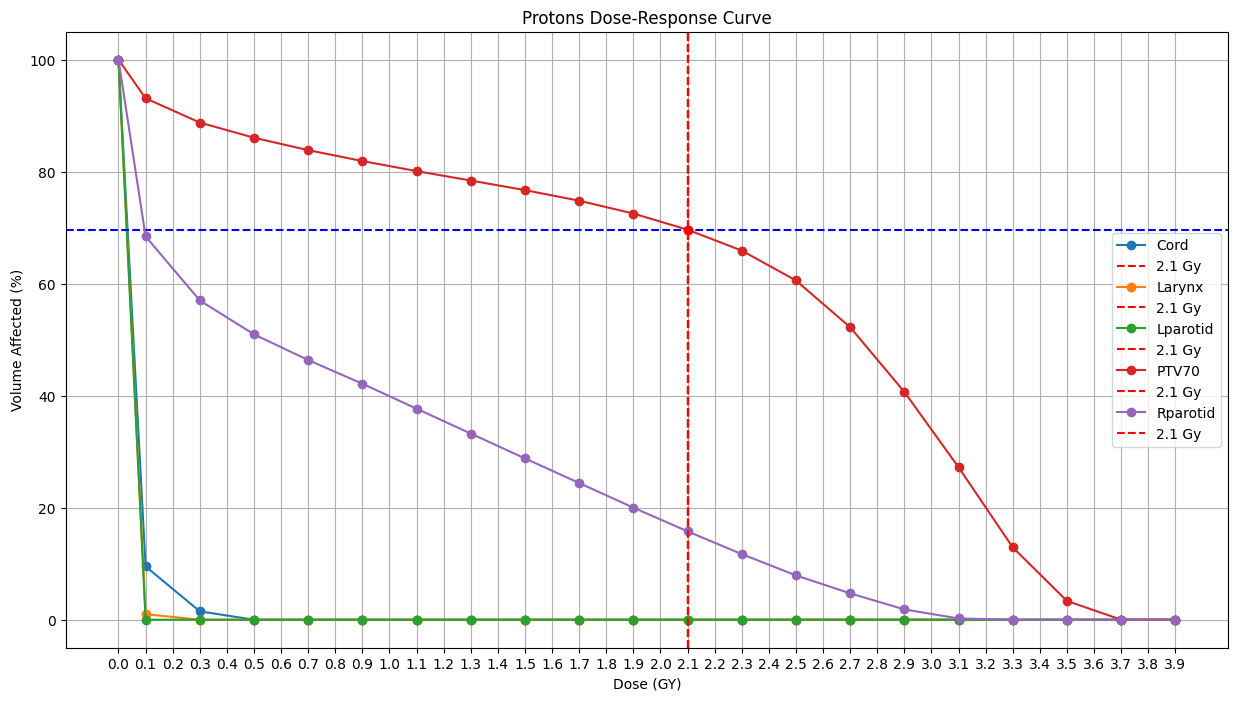

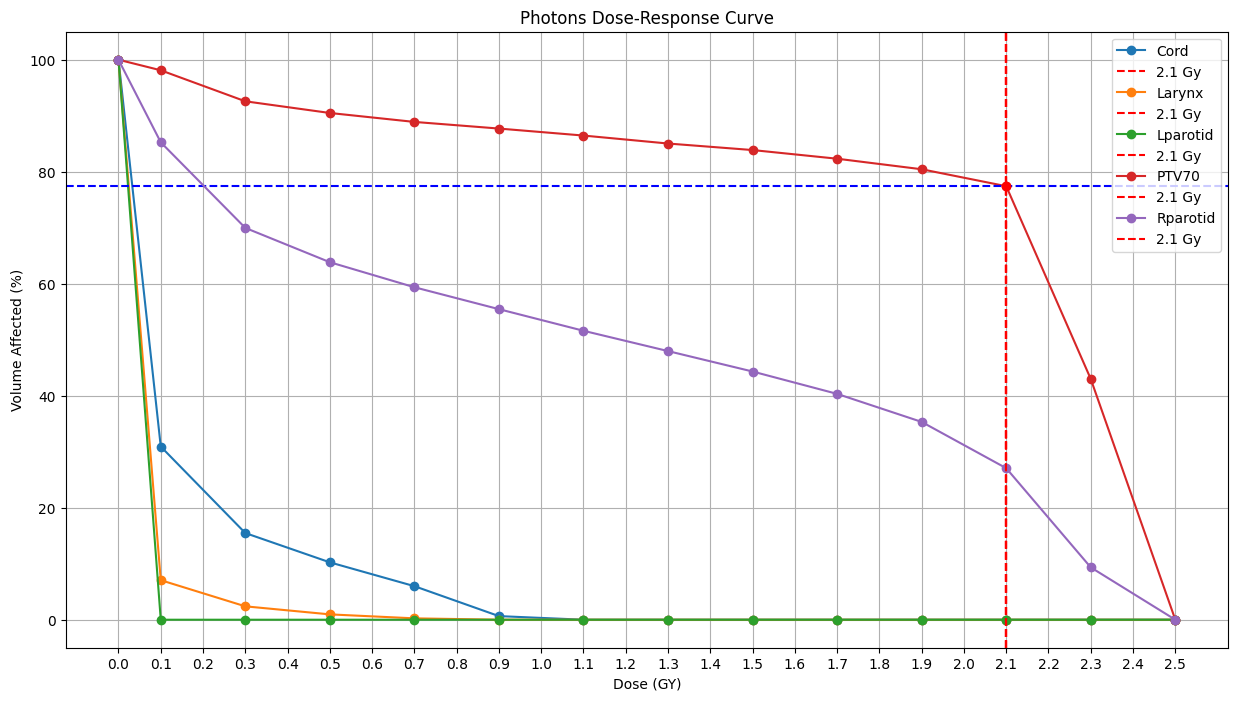

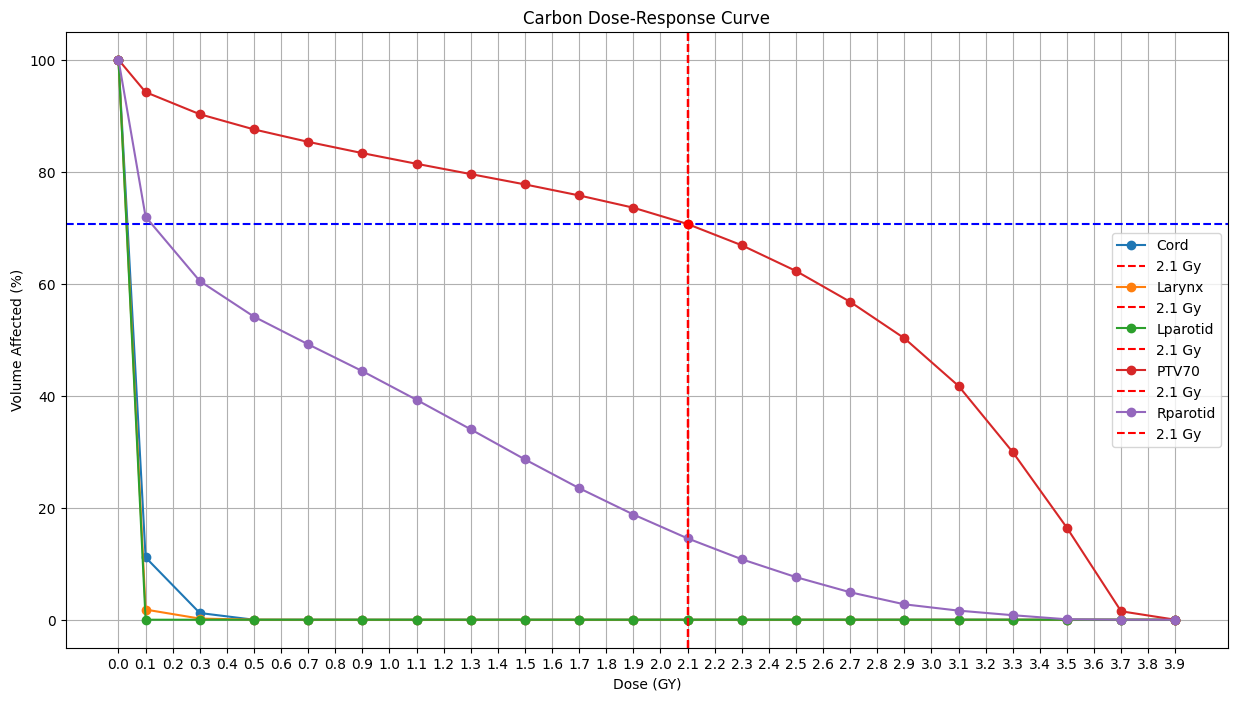

In [20]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_paths = {
    "Protons": "01_Protons_Dose_warpedSegmentation.csv",
    "Photons": "02_Photon_Dose_warpedSegmentation.csv",
    "Carbon": "03_Carbon_Dose_warpedSegmentation.csv"
}

# Define organs and corresponding dose columns
organs = ["Cord", "Larynx", "Lparotid", "PTV70", "Rparotid"]

def read_csv(file_path):
    with open(file_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]
    return data

# Load data
data = {key: read_csv(path) for key, path in file_paths.items()}

# Plot dose-response curves for each file
for key, records in data.items():
    plt.figure(figsize=(15, 8))
    for organ in organs:
        dose_col = f"{organ} Dose (GY)"
        
        # Dynamically find the correct value column
        value_col = next((col for col in records[0].keys() if organ in col and "Value" in col), None)
        
        if value_col is None:
            print(f"Warning: No value column found for {organ} in {key}")
            continue  # Skip this organ if no matching column is found
        
        dose_values = [float(row[dose_col]) if row[dose_col].strip() else 0 for row in records]
        value_values = [float(row[value_col]) if row[value_col].strip() else 0 for row in records]
    
        plt.plot(dose_values, value_values, label=organ, marker='o')
       
        #Mark the point at 2.1 Gy
        if organ == "PTV70" and 2.1 in dose_values:
            index = dose_values.index(2.1)
            plt.scatter(2.1, value_values[index], color='red', zorder=3)
            plt.axhline(y=value_values[index], color='blue', linestyle='--')
            plt.axvline(x=2.1, color='red', linestyle='--')
    
            
        # Add a vertical line at 2.1 Gy
        plt.axvline(x=2.1, color='red', linestyle='--', label='2.1 Gy')
    
    plt.title(f"{key} Dose-Response Curve")
    plt.xlabel("Dose (GY)")
    plt.ylabel("Volume Affected (%)")
    plt.legend()
    plt.grid(True)
        # Set X-axis scale to increments of 0.1
    plt.xticks(np.arange(min(dose_values), max(dose_values) + 0.1, 0.1))
    
    plt.show()

